## Assignment 3, Carlos Figueroa (cdf5579) Machine Learning, Fall 2023


In this notebook, we will work with the dataset: https://archive.ics.uci.edu/ml/datasets/Spambasein in order to study different methods for Support Vector Classification (SVM). For our SVM model, we will use SKlearn packages, that include SVC (Support Vector Classification) inside of the SVM package. The rationale behind using this model is that it allows us to modify its kernel's and C's in a comfortable manner, while simplifying our efforts to provide a robust classification method. 

Before we begin, let's remind ourselves that kernel is just the shape that the data might have, and C is the Regularization parameter. The strength of the regularization is inversely proportional to C. So it's a variable that will allow us to add slack into our classification, in order to not fall in the pitfalls mentioned in lecture where the separation of the hyperplane is not straightforward.

Now, let's start with some analysis on the data, and cleaning procedures.

In [33]:
#Install packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mtick
#import matplotlib as plt


In [34]:
#load the dataframe
df = pd.read_csv("spambase.data", names = range(1,59))

#column 58 is the target

In [35]:
with open("spambase.names") as f:
    print(f.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [36]:
#lets bring those column names
df.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "target"]

In [37]:
#now, we visualize the dataset to see if everything is in place
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Now, there's a couple of ways to start our analysis on this data. But first, we note that most of the data is composed of frequencies which go from 0 to a number not higher than 30, meaning that most of the data is really close to each other, and thus comparable across sections. However, we still have the last three variables that are real continuous numbers with no specific range, and that brings a problem to our analysis. 

Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features and it's therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training. Thus, if we are only comparing the frequencies, there would be not much need to standarize, but since we have those three variables without bounds, we might need to either:

1. Perform the analysis without normalizing, nor deleting the last three columns.

2. Run our analysis while excluding the last three variables, so that standarizing is not requiered.

2. Standarize all of our values before performing the analysis, so that the optimal hyperplane is not influenced by these variables

3. Standarize all of our values before performing the analysis, and delete the three last variables

Since this study is computationally strong, we will proceed to apply the last three tecniques.

Notwithstanding, there are reasons to believe that the last three variables might not be beneficial to our analysis. Those variables are analyzing the lenght of the emails in terms of the characters, and we suspect that spam emails are not longer nor shorter than normal emails in general, so its just a noisy variable that could be jeopardizing our observation. But so is the case for other variables that might not play a strong role in our study, its just that this one jeopardizes in scale particularly.

Moreover, for dataslip, we will use SKlearn model_selection package, train_test_split function. The reasons behind this choice its the convenience to break the data at the preferred ratio easily, and because it splits them randomly everytime we call the function, which allows us to repeat iterations and see consistency (pretty useful for bootstrapping)

## First, let's exclude variables, no normalizing:

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Y = df["target"] #just need the target column for Y

#three last variables
X = df.drop(["target", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"], axis=1) 


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) #test size 0.2 is for the 80-20 split 

In [58]:
#lets fit the model naively

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9319333816075308

But we will want to know more about the specifics of the model, so we have to find the Train Accuracy and Test Accuracy appart.

In [59]:
y_train_pred = model.predict(X_train) 
train_accuracy = accuracy_score(Y_train,y_train_pred)


y_test_pred = model.predict(X_test) 
test_accuracy = accuracy_score(Y_test,y_test_pred)

print(train_accuracy,test_accuracy)

0.941304347826087 0.9319333816075308


## Now, lets apply different kernel functions, and C's

Note that these are the parameters of the SVC function: (*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None) 

Now, since we must fill a table with each kernel type using 7 different C's, we will create a nested loop to perform this for us:

In [60]:
from sklearn.metrics import accuracy_score

#different kernels we have to apply
C = [.01, .1, 1, 10, 100, 1000, 10000]

#list of kernels
kernels = ['rbf','linear', 'poly']

#train accuracy with diff kernels
linear_train_accuracy = []
poly_train_accuracy = []
rbf_train_accuracy = []

#test accuracy with diff kernels
linear_test_accuracy = []
poly_test_accuracy = []
rbf_test_accuracy = []


for c in C:
    
    for kernel in kernels:
        
        #first, lets fit the model with the determine C and Kernel
        #if kernel is poly, then it needs the degree 2, otherwise it is ignored for other kernels
        model = SVC(C=c, kernel=kernel, degree = 2)
        model.fit(X_train, Y_train)
        
        #we get our predictions
        y_train_pred = model.predict(X_train) 
        y_test_pred = model.predict(X_test)
        
        #we obtain accuracy between predictions and data (from test and train Y)
        train_accuracy = accuracy_score(Y_train, y_train_pred) 
        test_accuracy = accuracy_score(Y_test, y_test_pred)
        
        #now we qualify them
        if kernel == 'rbf':
            rbf_train_accuracy.append(train_accuracy)
            rbf_test_accuracy.append(test_accuracy)
            
        elif kernel == 'linear':
            linear_train_accuracy.append(train_accuracy)
            linear_test_accuracy.append(test_accuracy)
            
        else:
            poly_train_accuracy.append(train_accuracy)
            poly_test_accuracy.append(test_accuracy)
            
            #now we display our results
        print(f"model with C: {c}, kernel: {kernel}")
        print("train acc:", train_accuracy)
        print("test acc:", test_accuracy)
        print("-----------------------------")
        

model with C: 0.01, kernel: rbf
train acc: 0.8288819875776398
test acc: 0.8204199855177408
-----------------------------
model with C: 0.01, kernel: linear
train acc: 0.9108695652173913
test acc: 0.9058653149891384
-----------------------------
model with C: 0.01, kernel: poly
train acc: 0.643167701863354
test acc: 0.6227371469949312
-----------------------------
model with C: 0.1, kernel: rbf
train acc: 0.9015527950310559
test acc: 0.9029688631426502
-----------------------------
model with C: 0.1, kernel: linear
train acc: 0.9273291925465839
test acc: 0.9167270094134685
-----------------------------
model with C: 0.1, kernel: poly
train acc: 0.8307453416149069
test acc: 0.8117306299782766
-----------------------------
model with C: 1, kernel: rbf
train acc: 0.941304347826087
test acc: 0.9319333816075308
-----------------------------
model with C: 1, kernel: linear
train acc: 0.9301242236024845
test acc: 0.9116582186821144
-----------------------------
model with C: 1, kernel: poly
tr

In [146]:
df_train = pd.DataFrame([rbf_train_accuracy, linear_train_accuracy, poly_train_accuracy], columns=C, index=kernels)
df_test = pd.DataFrame([rbf_test_accuracy, linear_test_accuracy, poly_test_accuracy], columns=C, index=kernels)

In [147]:
df_train['type'] = 'Train Accuracy'
df_test['type'] = 'Test Accuracy'

all_dfs = [df_train, df_test]

# Give all df's common column names

model_without_last3 = pd.concat(all_dfs)

In [148]:
model_without_last3

,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0,type
rbf,0.701553,0.912112,0.946894,0.965839,0.986957,0.993789,0.996273,Train Accuracy
linear,0.912733,0.924534,0.926708,0.929503,0.931056,0.931988,0.932298,Train Accuracy
poly,0.629193,0.724224,0.852795,0.951242,0.972671,0.986957,0.991925,Train Accuracy
rbf,0.682114,0.902969,0.918175,0.916003,0.921072,0.901521,0.881245,Test Accuracy
linear,0.905865,0.911658,0.911658,0.918175,0.916003,0.913831,0.913831,Test Accuracy
poly,0.608979,0.724113,0.843592,0.913831,0.885590,0.876901,0.873280,Test Accuracy


## Now we standarize without deleting the columns

In [99]:
#Now, lets Standarize our variables in order to train the model as best practice.

Y_1 = df["target"] #just need the target column for Y

#three last variables
X_1 = df.drop(["target"], axis=1) 

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size = 0.3) #test size 0.2 is for the 80-20 split 


In [100]:
#standarize the variables
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.fit_transform(X_test_1)

In [101]:
from sklearn.metrics import accuracy_score

#different kernels we have to apply
C = [.01, .1, 1, 10, 100, 1000, 10000]

#list of kernels
kernels = ['rbf','linear', 'poly']

#train accuracy with diff kernels
linear_train_accuracy_1 = []
poly_train_accuracy_1 = []
rbf_train_accuracy_1 = []

#test accuracy with diff kernels
linear_test_accuracy_1 = []
poly_test_accuracy_1 = []
rbf_test_accuracy_1 = []


for c in C:
    
    for kernel in kernels:
        
        #first, lets fit the model with the determine C and Kernel
        #if kernel is poly, then it needs the degree 2, otherwise it is ignored for other kernels
        model = SVC(C=c, kernel=kernel, degree = 2)
        model.fit(X_train_1, Y_train_1)
        
        #we get our predictions
        y_train_pred_1 = model.predict(X_train_1) 
        y_test_pred_1 = model.predict(X_test_1)
        
        #we obtain accuracy between predictions and data (from test and train Y)
        train_accuracy_1 = accuracy_score(Y_train_1, y_train_pred_1) 
        test_accuracy_1 = accuracy_score(Y_test_1, y_test_pred_1)
        
        #now we qualify them
        if kernel == 'rbf':
            rbf_train_accuracy_1.append(train_accuracy_1)
            rbf_test_accuracy_1.append(test_accuracy_1)
            
        elif kernel == 'linear':
            linear_train_accuracy_1.append(train_accuracy_1)
            linear_test_accuracy_1.append(test_accuracy_1)
            
        else:
            poly_train_accuracy_1.append(train_accuracy_1)
            poly_test_accuracy_1.append(test_accuracy_1)
            
            #now we display our results
        print(f"model with C: {c}, kernel: {kernel}")
        print("train acc:", train_accuracy_1)
        print("test acc:", test_accuracy_1)
        print("-----------------------------")

model with C: 0.01, kernel: rbf
train acc: 0.7161490683229814
test acc: 0.7270094134685011
-----------------------------
model with C: 0.01, kernel: linear
train acc: 0.9180124223602485
test acc: 0.9275887038377987
-----------------------------
model with C: 0.01, kernel: poly
train acc: 0.6164596273291926
test acc: 0.6459087617668356
-----------------------------
model with C: 0.1, kernel: rbf
train acc: 0.9090062111801243
test acc: 0.9145546705286025
-----------------------------
model with C: 0.1, kernel: linear
train acc: 0.9285714285714286
test acc: 0.9304851556842868
-----------------------------
model with C: 0.1, kernel: poly
train acc: 0.7251552795031055
test acc: 0.7371469949312093
-----------------------------
model with C: 1, kernel: rbf
train acc: 0.94472049689441
test acc: 0.9370021723388848
-----------------------------
model with C: 1, kernel: linear
train acc: 0.9304347826086956
test acc: 0.9297610427226647
-----------------------------
model with C: 1, kernel: poly
tr

In [149]:
df_train_1 = pd.DataFrame([rbf_train_accuracy_1, linear_train_accuracy_1, poly_train_accuracy_1], columns=C, index=kernels)
df_test_1 = pd.DataFrame([rbf_test_accuracy_1, linear_test_accuracy_1, poly_test_accuracy_1], columns=C, index=kernels)

In [150]:
df_train_1['type'] = 'Train Accuracy'
df_test_1['type'] = 'Test Accuracy'

all_dfs_1 = [df_train_1, df_test_1]

# Give all df's common column names

model_only_standarized = pd.concat(all_dfs_1)

In [151]:
model_only_standarized

,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0,type
rbf,0.716149,0.909006,0.944720,0.965528,0.985404,0.992236,0.995342,Train Accuracy
linear,0.918012,0.928571,0.930435,0.931366,0.934783,0.932609,0.932919,Train Accuracy
poly,0.616460,0.725155,0.845963,0.949689,0.970497,0.987267,0.992236,Train Accuracy
rbf,0.727009,0.914555,0.937002,0.938450,0.927589,0.918899,0.905141,Test Accuracy
linear,0.927589,0.930485,0.929761,0.933382,0.939175,0.937002,0.937726,Test Accuracy
poly,0.645909,0.737147,0.857350,0.925416,0.913106,0.893555,0.887038,Test Accuracy


## Now lets normalize after deleting the columns

In [105]:
Y_2 = df["target"] #just need the target column for Y

#three last variables
X_2 = df.drop(["target", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"], axis=1) 


X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size = 0.3) #test size 0.2 is for the 80-20 split 

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.fit_transform(X_test_2)

In [106]:
from sklearn.metrics import accuracy_score

#different kernels we have to apply
C = [.01, .1, 1, 10, 100, 1000, 10000]

#list of kernels
kernels = ['rbf','linear', 'poly']

#train accuracy with diff kernels
linear_train_accuracy_2 = []
poly_train_accuracy_2 = []
rbf_train_accuracy_2 = []

#test accuracy with diff kernels
linear_test_accuracy_2 = []
poly_test_accuracy_2 = []
rbf_test_accuracy_2 = []


for c in C:
    
    for kernel in kernels:
        
        #first, lets fit the model with the determine C and Kernel
        #if kernel is poly, then it needs the degree 2, otherwise it is ignored for other kernels
        model = SVC(C=c, kernel=kernel, degree = 2)
        model.fit(X_train_2, Y_train_2)
        
        #we get our predictions
        y_train_pred_2 = model.predict(X_train_2) 
        y_test_pred_2 = model.predict(X_test_2)
        
        #we obtain accuracy between predictions and data (from test and train Y)
        train_accuracy_2 = accuracy_score(Y_train_2, y_train_pred_2) 
        test_accuracy_2 = accuracy_score(Y_test_2, y_test_pred_2)
        
        #now we qualify them
        if kernel == 'rbf':
            rbf_train_accuracy_2.append(train_accuracy_2)
            rbf_test_accuracy_2.append(test_accuracy_2)
            
        elif kernel == 'linear':
            linear_train_accuracy_2.append(train_accuracy_2)
            linear_test_accuracy_2.append(test_accuracy_2)
            
        else:
            poly_train_accuracy_2.append(train_accuracy_2)
            poly_test_accuracy_2.append(test_accuracy_2)
            
            #now we display our results
        print(f"model with C: {c}, kernel: {kernel}")
        print("train acc:", train_accuracy_2)
        print("test acc:", test_accuracy_2)
        print("-----------------------------")

model with C: 0.01, kernel: rbf
train acc: 0.7270186335403727
test acc: 0.7023895727733527
-----------------------------
model with C: 0.01, kernel: linear
train acc: 0.9118012422360249
test acc: 0.9174511223750905
-----------------------------
model with C: 0.01, kernel: poly
train acc: 0.6251552795031056
test acc: 0.6154960173787111
-----------------------------
model with C: 0.1, kernel: rbf
train acc: 0.9142857142857143
test acc: 0.9138305575669804
-----------------------------
model with C: 0.1, kernel: linear
train acc: 0.9229813664596274
test acc: 0.9174511223750905
-----------------------------
model with C: 0.1, kernel: poly
train acc: 0.7285714285714285
test acc: 0.7146994931209268
-----------------------------
model with C: 1, kernel: rbf
train acc: 0.9440993788819876
test acc: 0.9348298334540188
-----------------------------
model with C: 1, kernel: linear
train acc: 0.9263975155279504
test acc: 0.9188993482983345
-----------------------------
model with C: 1, kernel: poly


In [152]:
df_train_2 = pd.DataFrame([rbf_train_accuracy_2, linear_train_accuracy_2, poly_train_accuracy_2], columns=C, index=kernels)
df_test_2 = pd.DataFrame([rbf_test_accuracy_2, linear_test_accuracy_2, poly_test_accuracy_2], columns=C, index=kernels)

In [155]:
df_train_2['type'] = 'Train Accuracy'
df_test_2['type'] = 'Test Accuracy'

all_dfs_2 = [df_train_2, df_test_2]

# Give all df's common column names

model_deleted_standarized = pd.concat(all_dfs_2)

In [156]:
model_deleted_standarized

,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0,type
rbf,0.727019,0.914286,0.944099,0.963975,0.984472,0.992236,0.995342,Train Accuracy
linear,0.911801,0.922981,0.926398,0.928261,0.928882,0.929503,0.928882,Train Accuracy
poly,0.625155,0.728571,0.859317,0.946584,0.969565,0.984161,0.990062,Train Accuracy
rbf,0.702390,0.913831,0.934830,0.931933,0.929761,0.911658,0.895728,Test Accuracy
linear,0.917451,0.917451,0.918899,0.921796,0.922520,0.925416,0.928313,Test Accuracy
poly,0.615496,0.714699,0.830558,0.912382,0.908762,0.895728,0.876901,Test Accuracy


## Now lets put them in format (tables together) and compare them

Here, we care mostly about the Test Accuracy results of each table to measure robustness, so the last three rows are the ones that matter the most for our analysis.

For our first model (deleting the last three variables) we have:


In [157]:
model_without_last3

,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0,type
rbf,0.701553,0.912112,0.946894,0.965839,0.986957,0.993789,0.996273,Train Accuracy
linear,0.912733,0.924534,0.926708,0.929503,0.931056,0.931988,0.932298,Train Accuracy
poly,0.629193,0.724224,0.852795,0.951242,0.972671,0.986957,0.991925,Train Accuracy
rbf,0.682114,0.902969,0.918175,0.916003,0.921072,0.901521,0.881245,Test Accuracy
linear,0.905865,0.911658,0.911658,0.918175,0.916003,0.913831,0.913831,Test Accuracy
poly,0.608979,0.724113,0.843592,0.913831,0.885590,0.876901,0.873280,Test Accuracy


Here, the best model is found in Kernel rbf, and C = 100. The performance we are referring to is 0.921072 for Test Accuracy. The linear model is the second best, while the Quadratic model performs not that well. It is also interesting to know that the best number for C to be is around 10 and a 100 for all of them, and after that their accuracy tends to go down (same as when c is very small).

Our second model where we do not skip any variables and just standarize it all:

In [158]:
model_only_standarized

,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0,type
rbf,0.716149,0.909006,0.944720,0.965528,0.985404,0.992236,0.995342,Train Accuracy
linear,0.918012,0.928571,0.930435,0.931366,0.934783,0.932609,0.932919,Train Accuracy
poly,0.616460,0.725155,0.845963,0.949689,0.970497,0.987267,0.992236,Train Accuracy
rbf,0.727009,0.914555,0.937002,0.938450,0.927589,0.918899,0.905141,Test Accuracy
linear,0.927589,0.930485,0.929761,0.933382,0.939175,0.937002,0.937726,Test Accuracy
poly,0.645909,0.737147,0.857350,0.925416,0.913106,0.893555,0.887038,Test Accuracy


Here, the best model is found in Kernel rbf, and C = 10. The performance we are referring to is 0.938450 for Test Accuracy. The linear model is the second best, while the Quadratic model still performs not that well. Here, as C goes up, our linear accuracy improves, to levels that can match the maximun found with Kernel rbf. However, the lower the C, the better, so we will also remain with rbf for this part.

And then the model where we deleted the three variables, and then standarized:

In [159]:
model_deleted_standarized

,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0,type
rbf,0.727019,0.914286,0.944099,0.963975,0.984472,0.992236,0.995342,Train Accuracy
linear,0.911801,0.922981,0.926398,0.928261,0.928882,0.929503,0.928882,Train Accuracy
poly,0.625155,0.728571,0.859317,0.946584,0.969565,0.984161,0.990062,Train Accuracy
rbf,0.702390,0.913831,0.934830,0.931933,0.929761,0.911658,0.895728,Test Accuracy
linear,0.917451,0.917451,0.918899,0.921796,0.922520,0.925416,0.928313,Test Accuracy
poly,0.615496,0.714699,0.830558,0.912382,0.908762,0.895728,0.876901,Test Accuracy


Same story as we have seen before, the highest accuracy is found on the Kernel rbf with 0.934830 test accuracy, on C = 1 though, substantially lower than our other models. The linear model is still getting very close to rbf performance, but its score increases as C increases as well, consistently with our second model.

## Then, we can conclude that Kernel RBF, with C = 10, on a normalized dataset without deleting any columns is the best model we can obtain in order to predict if an email is spam or not, with a test accuracy of  0.938450. 

A very close result is the RBF with C = 1 on the model that was normalized and the last three columns where deleted, with test accuracy of 0.934830, which is a fair tradeoff to not have a C = 10


## Provide an intuition for the results observed for different kernels and different C's



In [180]:
df_spam = df[df.target == 1]
df_not_spam = df[df.target != 1]

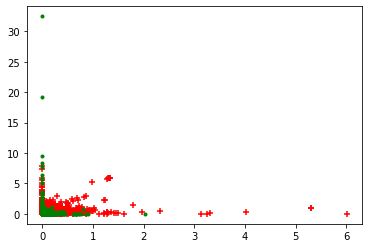

In [181]:
plt.scatter(df_spam['char_freq_$'], df_spam ['char_freq_!'], color = 'red', marker = '+')
plt.scatter(df_not_spam['char_freq_$'], df_not_spam ['char_freq_!'], color = 'green', marker = '.')

Trying to plot all the combinations would be a very hard job, and in most of the cases, since there's no really a weight on the importance of each variable in predicting, its hard to say what is the adequate Kernel for a multidimensional case like this. An spam email has a proper amount of characteristics that is remarked by a hyperplane on all the dimensions of the dataset. Then, it would be best to see the shape of this hyperplane by testing different kernels, and that's what we did.

Interesting enough, it seems like spam emails have more outliers in certain characteristics than normal emails, and this might play a role on why the Quadratic kernel wouldnt perform as well as the others.

Moreover, as we saw, the linear model was very close to the results of the rbf kernel, suggesting that there's a linear hyperplane that could classificate this data pretty efficiently. However, we mostly saw strong results on linear kernels when c was higher and higher, approaching a 1000, and that might just be too much slack in some cases. Let's note that C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data (a synonym to what we referred as soft-margin in our class). Then, as C goes higher, we run more into the risk of overfitting our data. Then, we will say that the rbf kernel is the best one on explaning the shape of the hyperplane without having to overfit too much.

In conclusion, because of the nature of the characteristics of a spam email, it was predictable that the linear kernel (as in more other cases) was not going to be sufficient in terms of test accuracy, and it only was if C was high. Regarding the Quadratic kernel, with out plotting we can see that it won't follow a relationship like that. And finally, because of the adaptiveness of the rbf kernel, we are able to get strong accuracy results without having to add too much slack